GOAL: Elite Classifier basing on User Basic Information 

Models to Compare On: 

    -Logistic Regression

    -Random Forest

    -Gradient Boosting

    -AdaBoost Classifier
    
    - Support vector machines.



In [5]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from collections import Counter
from collections import defaultdict
from confusion_mat import show_confusion_matrix,plot_roc

# Evaluation - Optimization Tools
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import normalize, scale, StandardScaler, Normalizer
from sklearn.grid_search import GridSearchCV

# Classification Algorithms
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier


Populating the interactive namespace from numpy and matplotlib


ImportError: cannot import name 'plot_roc'

In [2]:
user = pd.read_pickle('data/user')

In [3]:
user.columns

Index(['yelping_since', 'compliments_plain', 'review_count',
       'compliments_cute', 'compliments_writer', 'fans', 'compliments_note',
       'compliments_hot', 'compliments_cool', 'compliments_profile',
       'average_stars', 'compliments_more', 'elite', 'user_id', 'votes_cool',
       'compliments_list', 'votes_funny', 'compliments_photos',
       'compliments_funny', 'votes_useful', 'yelping_period', 'elite_status',
       'n_friends', 'tip_count', 'compliments'],
      dtype='object')

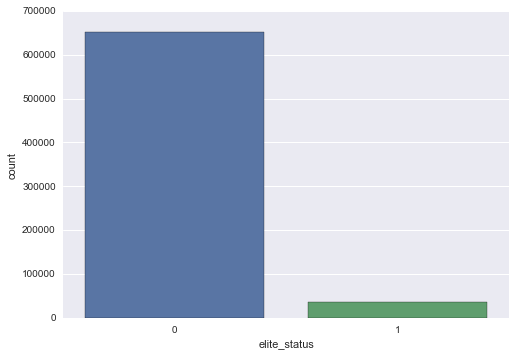

In [5]:
sns.countplot(user['elite_status'])

# Feature Selection 

In [7]:
# use all features given in user information 
all_features = [ 'compliments_plain', 'review_count',
       'compliments_cute', 'compliments_writer', 'fans', 'compliments_note',
       'compliments_hot', 'compliments_cool', 'compliments_profile',
       'average_stars', 'compliments_more', 'votes_cool',
       'compliments_list', 'votes_funny', 'compliments_photos',
       'compliments_funny', 'votes_useful', 'yelping_period', 
       'n_friends', 'tip_count']
len(all_features)

20

In [8]:
X_original = user[all_features]
y_original= user.elite_status
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original,y_original,test_size=0.2)
scale = StandardScaler()
X_train_original = scale.fit_transform(X_train_original)
X_test_original= scale.fit_transform(X_test_original)

In [9]:
# combine all compliments into one 
features = [ 'review_count','fans', 'average_stars','yelping_period','n_friends','tip_count',
            'votes_cool','votes_funny', 'votes_useful', 'compliments']
X_1 = user[features]
y_1= user.elite_status
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size=0.2)
X_train_1 = scale.fit_transform(X_train_1)
X_test_1 = scale.fit_transform(X_test_1)

# Choose Best Models on CV

In [10]:
def cross_val(models,X_train,y_train):
    for model in models:
        model.fit(X_train,y_train)
        
        print(str(model).split('(')[0],'CV:')
        print('-- Accuracy:', round((cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy').mean()), 3),
              '| Recall:', round(cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean(), 3),
              '| Precision:', round(cross_val_score(model, X_train, y_train, cv=5, scoring='precision').mean(), 3),
              '| f1:', round(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean(), 3),
             '| auc:',round(cross_val_score(model, X_train, y_train, cv=5, scoring= 'roc_auc').mean(), 3))
            

In [11]:
clf = [LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),
      DecisionTreeClassifier(),SGDClassifier(),GradientBoostingClassifier()]

In [13]:
# Warning: This takes a long time to run. So get ready to sit back and wait! More than an hour already!

In [18]:
gbc = GradientBoostingClassifier()

In [ ]:
cross_val([gbc], X_train_1,y_train_1)

GradientBoostingClassifier CV:


In [14]:
# CV of combined compliment features
cross_val(clf,X_train_1,y_train_1)

LogisticRegression CV:
-- Accuracy: 0.974 | Recall: 0.602 | Precision: 0.847 | f1: 0.704 | auc: 0.987
RandomForestClassifier CV:
-- Accuracy: 0.979 | Recall: 0.726 | Precision: 0.84 | f1: 0.779 | auc: 0.976
AdaBoostClassifier CV:
-- Accuracy: 0.979 | Recall: 0.778 | Precision: 0.81 | f1: 0.794 | auc: 0.992
DecisionTreeClassifier CV:
-- Accuracy: 0.97 | Recall: 0.724 | Precision: 0.708 | f1: 0.717 | auc: 0.854
SGDClassifier CV:
-- Accuracy: 0.975 | Recall: 0.617 | Precision: 0.867 | f1: 0.71 | auc: 0.979


In [ ]:
# CV of all features
cross_val(clf,X_train_orginal,y_train_orginal)

In [ ]:
LogisticRegression CV:
-- Accuracy: 0.971 | Recall: 0.568 | Precision: 0.824 | f1: 0.672 | auc: 0.985
RandomForestClassifier CV:
-- Accuracy: 0.978 | Recall: 0.72 | Precision: 0.828 | f1: 0.769 | auc: 0.973
AdaBoostClassifier CV:
-- Accuracy: 0.978 | Recall: 0.769 | Precision: 0.796 | f1: 0.782 | auc: 0.991
DecisionTreeClassifier CV:
-- Accuracy: 0.969 | Recall: 0.712 | Precision: 0.698 | f1: 0.704 | auc: 0.847
SGDClassifier CV:
-- Accuracy: 0.972 | Recall: 0.545 | Precision: 0.862 | f1: 0.676 | auc: 0.98

# We see the AdaBoostClassifier and RandomForestClassifier have the highest score for accuracy, recall and precision and f1 out of all the estimators 

In [12]:
new_clf = [RandomForestClassifier(),AdaBoostClassifier()]

# Optimize Chosen Models - GridSearch

In [94]:
def gs_rf(X_train,y_train):

    param =  [{'max_features': [3,8],'max_depth': [10,20], 
                     'n_estimators' : [500,1000] }]
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid = param, verbose = 3, cv = 3,n_jobs= -1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    output =  grid_search.best_params_
        
    return output 
                   

In [96]:
rf_1 = gs_rf(X_train_1,y_train_1)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] max_features=3, max_depth=10, n_estimators=500 ..................
[CV] max_features=3, max_depth=10, n_estimators=500 ..................
[CV] max_features=3, max_depth=10, n_estimators=500 ..................
[CV] max_features=3, max_depth=10, n_estimators=1000 .................
[CV]  max_features=3, max_depth=10, n_estimators=500, score=0.979463 -14.3min
[CV] max_features=3, max_depth=10, n_estimators=1000 .................
[CV]  max_features=3, max_depth=10, n_estimators=500, score=0.979102 -14.4min
[CV] max_features=3, max_depth=10, n_estimators=1000 .................
[CV]  max_features=3, max_depth=10, n_estimators=500, score=0.979009 -14.4min
[CV] max_features=8, max_depth=10, n_estimators=500 ..................
[CV]  max_features=3, max_depth=10, n_estimators=1000, score=0.979583 -24.7min
[CV] max_features=8, max_depth=10, n_estimators=500 ..................
[CV]  max_features=3, max_depth=10, n_estimators=1000, scor

KeyboardInterrupt: 

In [15]:
rf_1 

defaultdict(list,
            {'accuracy': (0.9789164742810117,
              {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 8}),
             'f1': (0.7900932763034957,
              {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 5}),
             'precision': (0.8250082235314551,
              {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2}),
             'recall': (0.7673704426659572,
              {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 5})})

In [ ]:
stage_score_plot(ada, X_train_1,y_train_1,X_test_1,y_test_1)

In [63]:
def gs_abc(X_train,y_train):
    param = [{'learning_rate': [0.5,0.8,1],'n_estimators': [100,500,800]}]
    grid_search = GridSearchCV(AdaBoostClassifier(), param_grid = param, verbose = 1, cv = 3,n_jobs= -1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    param = grid_search.best_params_
    return param


In [93]:
abc_1 = gs_abc(X_train_1,y_train_1)

AdaBoosting Classifer
accuracy 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.3min finished


recall 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.0min finished


precision 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.8min finished


f1 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.0min finished


In [94]:
abc_1

defaultdict(list,
            {'accuracy': (0.8261497288541446,
              {'learning_rate': 0.8, 'n_estimators': 800}),
             'f1': (0.8156364736219641,
              {'learning_rate': 0.8, 'n_estimators': 800}),
             'precision': (0.8187658548023466,
              {'learning_rate': 0.8, 'n_estimators': 800}),
             'recall': (0.8129603337782988,
              {'learning_rate': 0.8, 'n_estimators': 500})})

# Apply Model to Testing Dataset

In [2]:
def fit_model(model,features,X_train,y_train,X_test,y_test):
    "Fit Model --- Return Evaluation Metrics"
    
    model = model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print(str(model).split('(')[0],':')
    print('Train | Accuracy:', round(accuracy_score(y_train, train_pred),3),
          '| Recall',round(recall_score(y_train, train_pred),3),
          '| Precision',round(precision_score(y_train, train_pred),3),
          '| f1',round(f1_score(y_train, train_pred),3))

    print('Test | Accuracy:', round(accuracy_score(y_test, test_pred),3),
          '| Recall',round(recall_score(y_test, test_pred),3),
          '| Precision',round(precision_score(y_test, test_pred),3),
          '| f1',round(f1_score(y_test, test_pred),3))
    
    feature_importances = model.feature_importances_
    feature_indices = np.argsort(feature_importances)[::-1]
    print(' ')
    print('Features Importance Order')
    for f,index in enumerate(feature_indices):
        print("%2d) %-*s %f" % (f + 1, 30,features[index], feature_importances[index]))
    return test_pred


In [15]:
rf = RandomForestClassifier(max_depth= 12,
               max_features= None,
               min_samples_leaf= 8, n_estimators = 500)

In [ ]:
'RF - combined compliments '
fit_model(rf,features,X_train_1,y_train_1,X_test_1,y_test_1)

In [72]:
'RF - all features'
fit_model(rf,all_features,X_train_original,y_train_original,X_test_original,y_test_original) #2:10 

RandomForestClassifier :
Train | Accuracy: 0.984 | Recall 0.813 | Precision 0.879 | f1 0.845
Test | Accuracy: 0.98 | Recall 0.755 | Precision 0.838 | f1 0.794
 
Features Importance Order
 1) votes_cool                     0.680027
 2) review_count                   0.087457
 3) compliments_writer             0.074926
 4) compliments_hot                0.038218
 5) yelping_period                 0.026169
 6) n_friends                      0.017266
 7) average_stars                  0.012710
 8) compliments_cool               0.011843
 9) votes_useful                   0.010568
10) votes_funny                    0.009311
11) compliments_more               0.005683
12) fans                           0.005556
13) compliments_funny              0.004328
14) compliments_note               0.003547
15) compliments_plain              0.003522
16) tip_count                      0.002481
17) compliments_photos             0.002119
18) compliments_profile            0.002037
19) compliments_cute 

In [40]:
ada = AdaBoostClassifier(learning_rate=0.8,n_estimators=500)

In [41]:
fit_model(ada,all_features,X_train_original,y_train_original,X_test_original,y_test_original) #2:10 

AdaBoostClassifier :
Train | Accuracy: 0.98 | Recall 0.783 | Precision 0.826 | f1 0.804
Test | Accuracy: 0.98 | Recall 0.768 | Precision 0.835 | f1 0.8
 
Features Importance Order
 1) review_count                   0.206000
 2) votes_useful                   0.114000
 3) average_stars                  0.076000
 4) compliments_writer             0.068000
 5) votes_funny                    0.064000
 6) tip_count                      0.064000
 7) compliments_cool               0.054000
 8) votes_cool                     0.050000
 9) yelping_period                 0.044000
10) compliments_hot                0.042000
11) compliments_more               0.028000
12) n_friends                      0.028000
13) fans                           0.028000
14) compliments_cute               0.024000
15) compliments_plain              0.024000
16) compliments_photos             0.022000
17) compliments_funny              0.022000
18) compliments_note               0.020000
19) compliments_profile     

In [48]:
fit_model(ada,X_train,y_train,X_test,y_test) #2:10 

AdaBoostClassifier :
Train | Accuracy: 0.979 | Recall 0.779 | Precision 0.81 | f1 0.794
Test | Accuracy: 0.978 | Recall 0.745 | Precision 0.809 | f1 0.776
 
Features Importance Order
 1) review_count                   0.210000
 2) votes_useful                   0.180000
 3) compliments                    0.154000
 4) average_stars                  0.120000
 5) votes_funny                    0.088000
 6) votes_cool                     0.060000
 7) yelping_period                 0.060000
 8) tip_count                      0.056000
 9) n_friends                      0.038000
10) fans                           0.034000


# Different dataset

## For user that have at at least 30 reviews

In [74]:
user_40 = user.ix[user['review_count'] > 40]

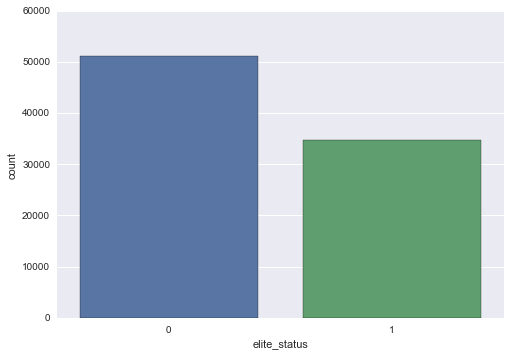

In [76]:
sns.countplot(user_40['elite_status'])

In [52]:
X_40 = user_40[features]
y_40 = user_40.elite_status
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X_40,y_40,test_size=0.2)

In [53]:
scale = StandardScaler()
X_train_40 = scale.fit_transform(X_train_40)
X_test_40 = scale.fit_transform(X_test_40)

In [54]:
new_clf = [RandomForestClassifier(),AdaBoostClassifier()]

In [27]:
cross_val(new_clf,X_train_40,y_train_40)

RandomForestClassifier CV:
-- Accuracy: 0.833 | Recall: 0.739 | Precision: 0.827 | f1: 0.783 | auc: 0.898
AdaBoostClassifier CV:
-- Accuracy: 0.838 | Recall: 0.785 | Precision: 0.808 | f1: 0.797 | auc: 0.913


## -- Tunning Hyperparameters

In [58]:
rf_40_outcome = gs_rf(X_train_40,y_train_40)

Random Forest
accuracy 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.831988 -   1.2s
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.839395 -   1.2s
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.838388 -   1.2s
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.836328 -   1.2s
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV]  min_samples

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.3s


[CV]  min_samples_leaf=5, max_depth=6, max_features=log2, score=0.833709 -   1.5s
[CV] min_samples_leaf=8, max_depth=6, max_features=log2 ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.836715 -   1.4s
[CV] min_samples_leaf=8, max_depth=6, max_features=log2 ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.838897 -   1.4s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.841141 -   1.3s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.835310 -   1.3s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.836401 -   1.5s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=None, score=0.836352 -   2.6s


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   59.9s


[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.840061 -   3.7s
[CV] min_samples_leaf=2, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.843552 -   3.7s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.843468 -   3.5s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.841929 -   3.4s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.836764 -   3.5s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=5, max_depth=12, max_features=None, score=0.840497 -   3.4s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=5, max_depth=12, max_features=None, score=0.846098 - 

[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.2min finished


recall 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.769507 -   0.9s
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.759619 -   0.9s
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.764791 -   0.8s
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.768069 -   0.9s
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_dep

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.6s


[CV]  min_samples_leaf=5, max_depth=6, max_features=log2, score=0.766409 -   0.9s
[CV] min_samples_leaf=8, max_depth=6, max_features=log2 ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.749910 -   0.9s
[CV] min_samples_leaf=8, max_depth=6, max_features=log2 ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.768968 -   0.9s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.768069 -   0.9s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.762992 -   0.8s
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.770905 -   0.9s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=None, score=0.775440 -   2.1s


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   50.6s


[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.779576 -   5.6s
[CV] min_samples_leaf=2, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.792700 -   5.7s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.794821 -   5.6s
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.790543 -   5.7s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.776299 -   4.7s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=5, max_depth=12, max_features=None, score=0.779216 -   4.7s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=5, max_depth=12, max_features=None, score=0.793599 - 

[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.1min finished


precision 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.820777 -   0.8s
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.823691 -   0.9s
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.826555 -   0.9s
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.818129 -   0.9s
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.5s


[CV]  min_samples_leaf=5, max_depth=6, max_features=log2, score=0.813472 -   1.0s
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.821960 -   1.0s
[CV] min_samples_leaf=8, max_depth=6, max_features=log2 ..............
[CV] min_samples_leaf=8, max_depth=6, max_features=log2 ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.821573 -   1.0s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.822398 -   0.9s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.815443 -   0.9s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.817969 -   0.9s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=None, score=0.820362 -   2.1s


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   47.8s


[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.815399 -   3.4s
[CV] min_samples_leaf=2, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.814698 -   3.4s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.815545 -   3.4s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.809902 -   3.3s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.812851 -   3.3s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=5, max_depth=12, max_features=None, score=0.816632 -   3.3s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=5, max_depth=12, max_features=None, score=0.817459 - 

[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   59.9s finished


f1 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.786034 -   1.0s
[CV] min_samples_leaf=2, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.793437 -   1.0s
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.795884 -   1.0s
[CV]  min_samples_leaf=2, max_depth=6, max_features=auto, score=0.793545 -   1.0s
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV] min_samples_leaf=5, max_depth=6, max_features=auto ..............
[CV]  min_samples_leaf=2, max_depth=6

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.5s


[CV]  min_samples_leaf=5, max_depth=6, max_features=log2, score=0.785113 -   1.2s
[CV] min_samples_leaf=8, max_depth=6, max_features=log2 ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.787076 -   1.2s
[CV] min_samples_leaf=8, max_depth=6, max_features=log2 ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.795134 -   1.2s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.791003 -   1.2s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.791039 -   1.2s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=8, max_depth=6, max_features=log2, score=0.783519 -   1.2s
[CV] min_samples_leaf=2, max_depth=6, max_features=None ..............
[CV]  min_samples_leaf=2, max_depth=6, max_features=None, score=0.794349 -   2.7s


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   54.6s


[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.799267 -   3.9s
[CV] min_samples_leaf=2, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.802886 -   3.8s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.799597 -   4.0s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.800400 -   3.9s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=5, max_depth=12, max_features=None, score=0.796473 -   3.4s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=2, max_depth=12, max_features=None, score=0.795764 -   3.5s
[CV] min_samples_leaf=5, max_depth=12, max_features=None .............
[CV]  min_samples_leaf=5, max_depth=12, max_features=None, score=0.802524 - 

[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.1min finished


In [59]:
rf_40_outcome

defaultdict(list,
            {'accuracy': (0.8428571428571429,
              {'max_depth': 12,
               'max_features': 'auto',
               'min_samples_leaf': 5}),
             'f1': (0.8028562673235098,
              {'max_depth': 12,
               'max_features': 'auto',
               'min_samples_leaf': 5}),
             'precision': (0.8237188479333692,
              {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 8}),
             'recall': (0.7867879031975912,
              {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 2})})

In [61]:
rf_40 = RandomForestClassifier(max_depth= 12,
               max_features= 'auto',
               min_samples_leaf= 5, n_estimators = 500)

In [64]:
abc_outcome = gs_abc(X_train_40,y_train_40)

AdaBoosting Classifer
accuracy 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.9min finished


recall 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.3min finished


precision 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.7min finished


f1 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.4min finished


In [65]:
abc_outcome 

defaultdict(list,
            {'accuracy': (0.8421734070410242,
              {'learning_rate': 0.5, 'n_estimators': 800}),
             'f1': (0.8019536391491112,
              {'learning_rate': 0.5, 'n_estimators': 800}),
             'precision': (0.8145763378719676,
              {'learning_rate': 1, 'n_estimators': 500}),
             'recall': (0.7900963284991483,
              {'learning_rate': 0.5, 'n_estimators': 500})})

In [66]:
ada_40 = AdaBoostClassifier(learning_rate=0.5,n_estimators =800)

In [40]:
round(100 - (y_40.mean() * 100),2)

59.56

# Fit model 

In [62]:
fit_model(rf_40,X_train_40,y_train_40,X_test_40, y_test_40)

RandomForestClassifier :
Train | Accuracy: 0.878 | Recall 0.829 | Precision 0.864 | f1 0.846
Test | Accuracy: 0.811 | Recall 0.605 | Precision 0.892 | f1 0.721
 
Features Importance Order
 1) votes_cool                     0.331488
 2) compliments                    0.254898
 3) votes_funny                    0.108997
 4) review_count                   0.094089
 5) yelping_period                 0.052107
 6) votes_useful                   0.048632
 7) n_friends                      0.043220
 8) average_stars                  0.032661
 9) fans                           0.026377
10) tip_count                      0.007532


In [67]:
fit_model(ada_40,X_train_40,y_train_40, X_test_40, y_test_40) 

AdaBoostClassifier :
Train | Accuracy: 0.844 | Recall 0.791 | Precision 0.816 | f1 0.804
Test | Accuracy: 0.792 | Recall 0.545 | Precision 0.901 | f1 0.679
 
Features Importance Order
 1) compliments                    0.211250
 2) votes_useful                   0.145000
 3) votes_funny                    0.143750
 4) average_stars                  0.120000
 5) votes_cool                     0.117500
 6) review_count                   0.108750
 7) yelping_period                 0.055000
 8) n_friends                      0.045000
 9) fans                           0.037500
10) tip_count                      0.016250
